# Naive Bayes Classifier

dataset: https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format

---

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [11]:
# import dataset

df = pd.read_csv('dataset/movie_review_dataset.csv')
print(df.shape)
df.head()

(5000, 2)


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


label 1 = positive review text

label 0 = negative review text

In [12]:
# ambil kolom Review & Sentiment

col = ['text', 'label']
df = df[col]

print(df['label'].value_counts())

df.head(5)

1    2505
0    2495
Name: label, dtype: int64


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [13]:
# df.head()[['Review', 'Sentiment']].values[0]

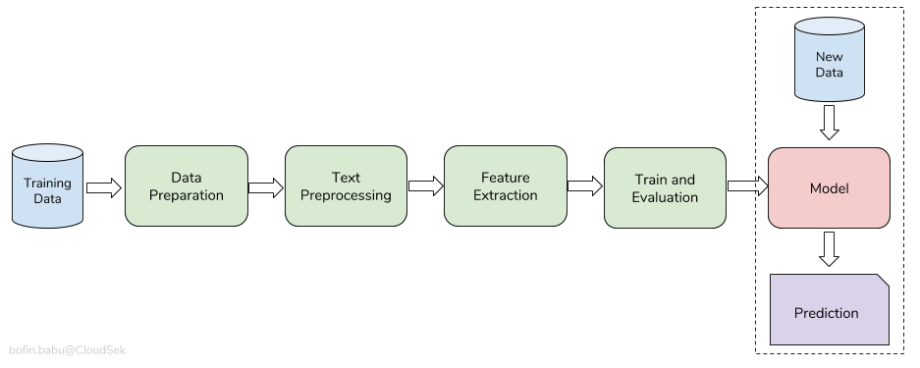

https://cloudsek.com/wp-content/uploads/2019/12/text-classification-workflow-920x368.png

<br><br><br><br>

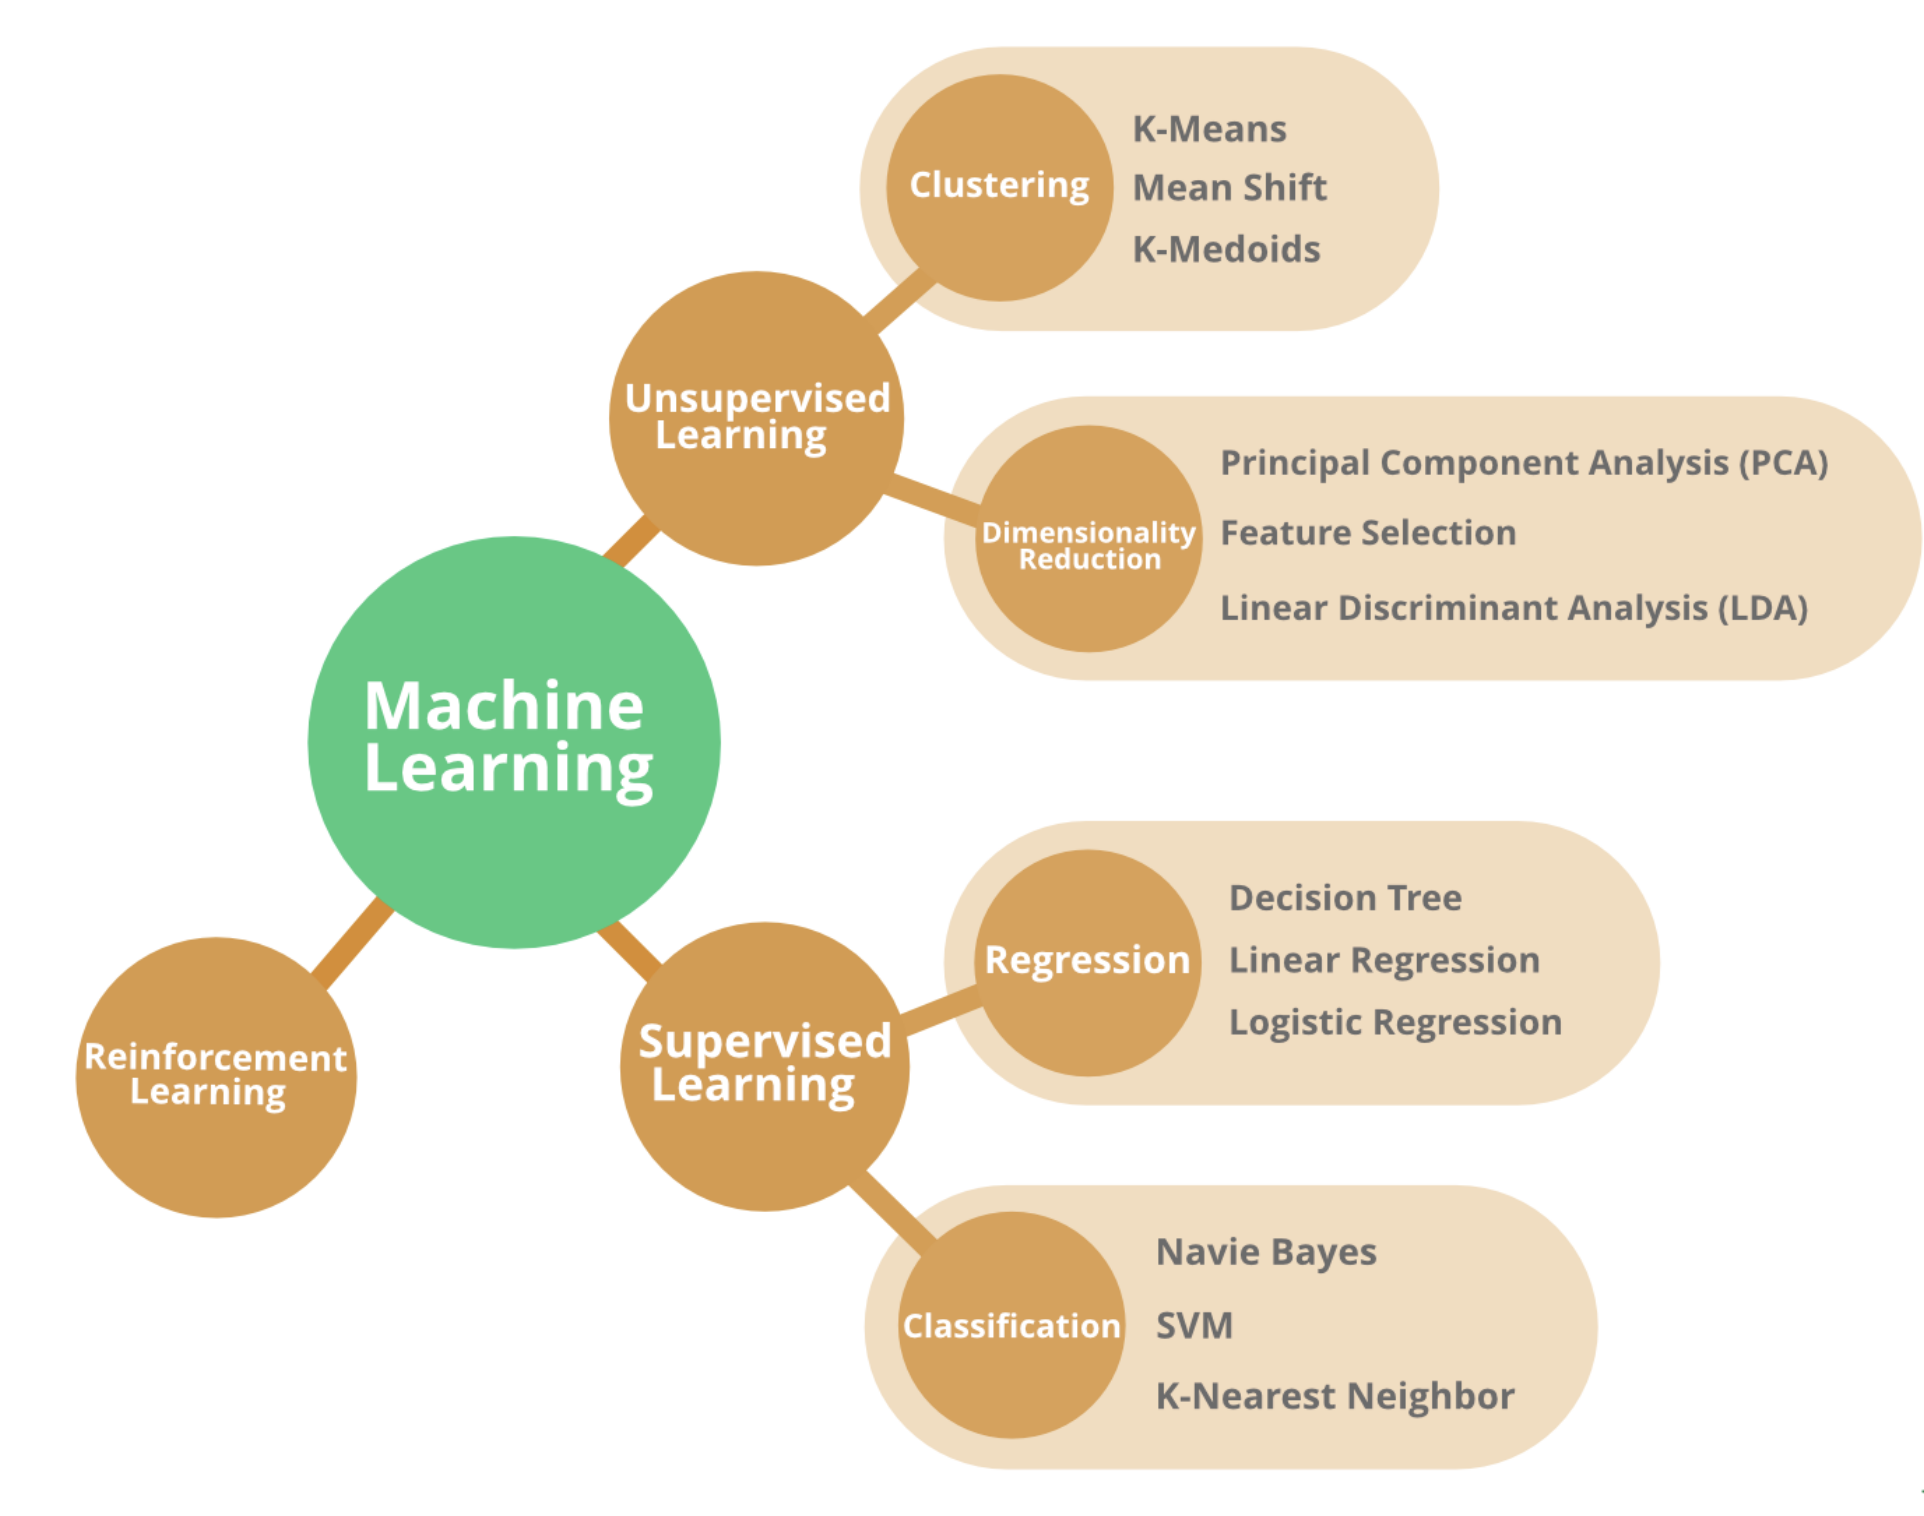

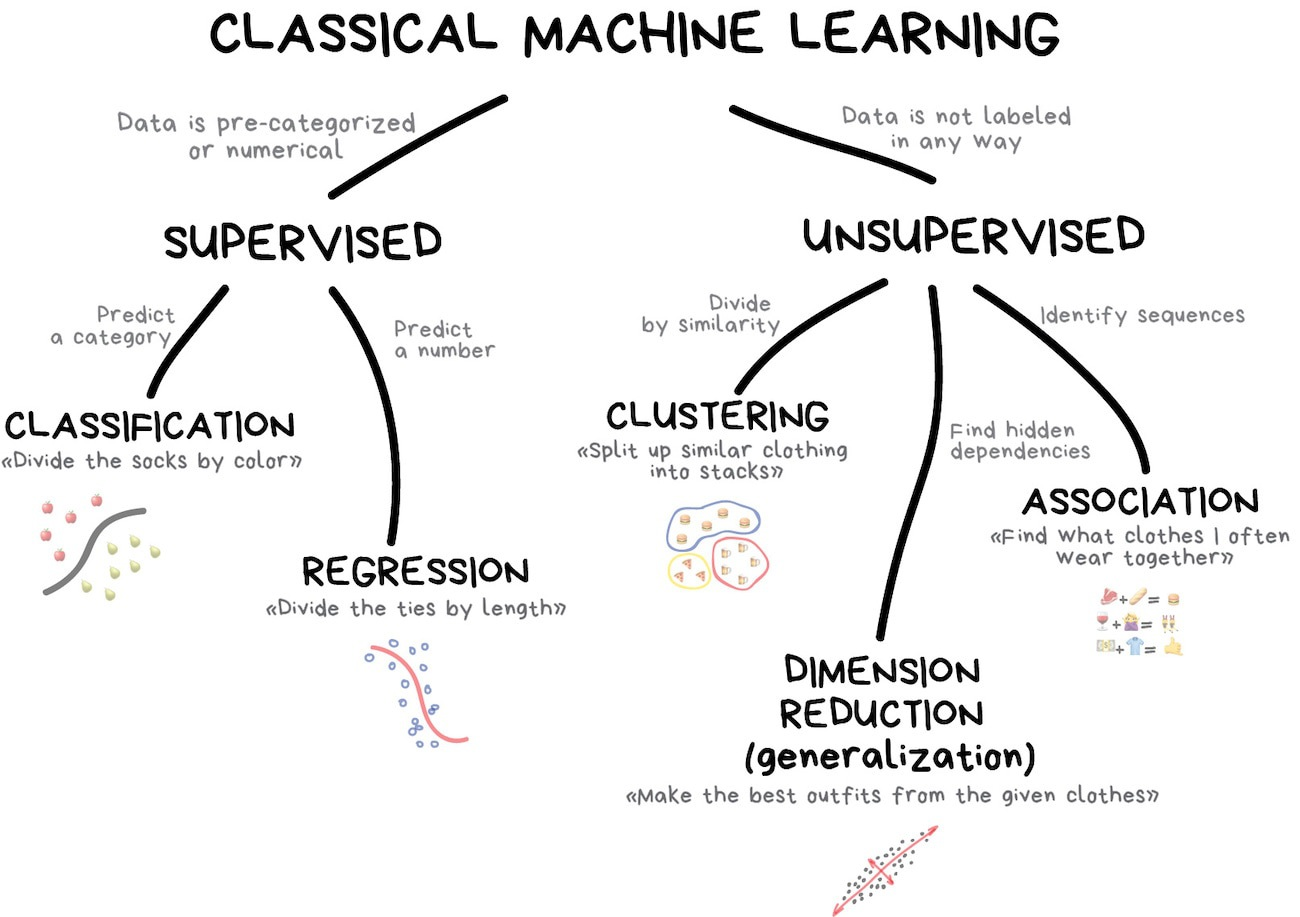

https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190522174744/MachineLearning.png
https://vitalflux.com/wp-content/uploads/2020/12/mind_map_machine_learning_3.jpg

---

# Modelling

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

### Modelling: Data Transformation Step

merubah data teks menjadi angka sehingga bisa dibaca oleh computer (model)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], 
    df['label'],
    random_state=0
)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = count_vect.transform(X_test)

### Modelling: Training Step

melatih model multinomial naive bayes

In [27]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### Modelling: Predicting Step

melakukan prediksi menggunakan salah satu data di training set

In [28]:
print('sample to predict:')
print(df.text[100])
print('')
print('actual label:')
print(df.label[100])

pred = clf.predict(count_vect.transform([df.text[100]]))
print('')
print('hasil prediksi:')
print(pred)

sample to predict:
Maybe it's unfair to dislike a movie for what it isn't, rather than what it is, but I approached this hoping that finally a filmmaker would make a movie about small-town rural gay men and women. Instead, the focus is primarily on the outrageous bigotry (big news!) of the locals (and those in outlying areas) and the really gruesome torture/murder of a young gay man.<br /><br />So much time devoted to stupid people squawking about AIDS, sin, hellfire, and perverts. So much time devoted to the ghoulish preacher ranting about the Bible and gay people getting what they deserve.<br /><br />I wanted to see more of the people that came to the "small town gay bar", not those who opposed it. In addition, the young man who was murdered isn't even from this town.<br /><br />The whole movie works as a warning rather than a celebration, and it's very suspect.

actual label:
0

hasil prediksi:
[0]


### Modelling: Calculate Accuracy, Precision, Recall

melakukan prediksi menggunakan salah satu data di training set

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_all_data = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, pred_all_data)
print('')
print('hasil accuracy:')
print(accuracy)

precision = precision_score(y_test, pred_all_data, average='macro')
print('')
print('hasil precision:')
print(precision)

recall = recall_score(y_test, pred_all_data, average='macro')
print('')
print('hasil recall:')
print(recall)


hasil accuracy:
0.7456

hasil precision:
0.8038725076262974

hasil recall:
0.7497471067734409


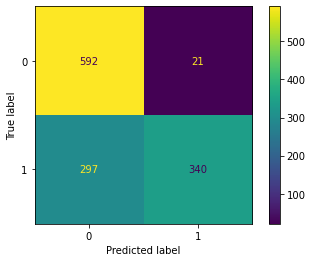

In [31]:
plot_confusion_matrix(clf, X_test_tfidf, y_test) 